<a href="https://colab.research.google.com/github/hmadhavan57/927621BAL015/blob/main/House_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Prices Prediction**

# Install TensorFlow Decision Forests

In [52]:
!pip3 install tensorflow_decision_forests --upgrade

**Decision Forests** are a family of tree-based models, including Random Forests and Gradient Boosted Trees. They are the best place to start when working with tabular data and will often outperform (or provide a strong baseline) before you begin experimenting with neural networks.


## Import the Necessary Libraries

In [53]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#To ignore the warnings
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [55]:
dataset_df = pd.read_csv("train.csv")
dataset_df.shape

(1460, 81)

## Dataset's Structure

In [57]:
dataset_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [58]:
dataset_df = dataset_df.drop('Id', axis=1)
dataset_df.head(3)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [59]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Visualization

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


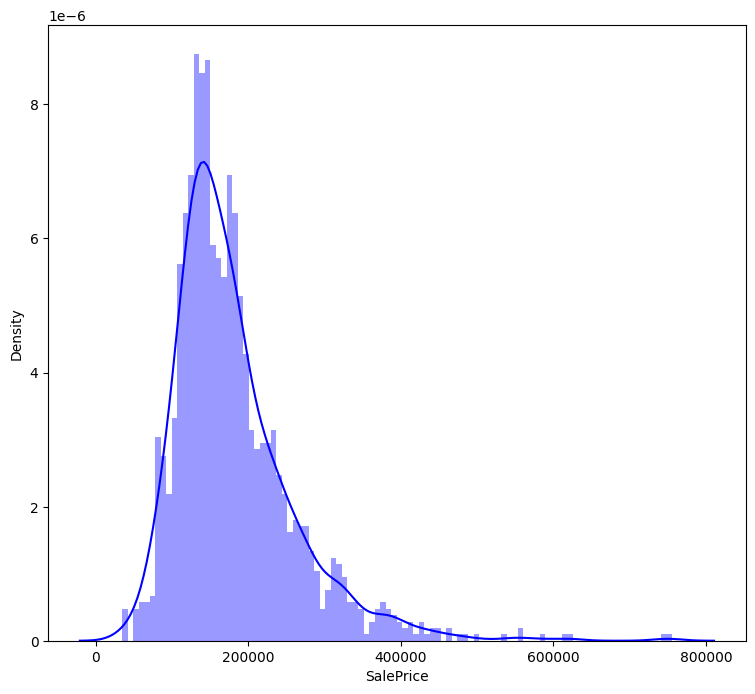

In [11]:
print(dataset_df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataset_df['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.4});

In [12]:
list(set(dataset_df.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [14]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


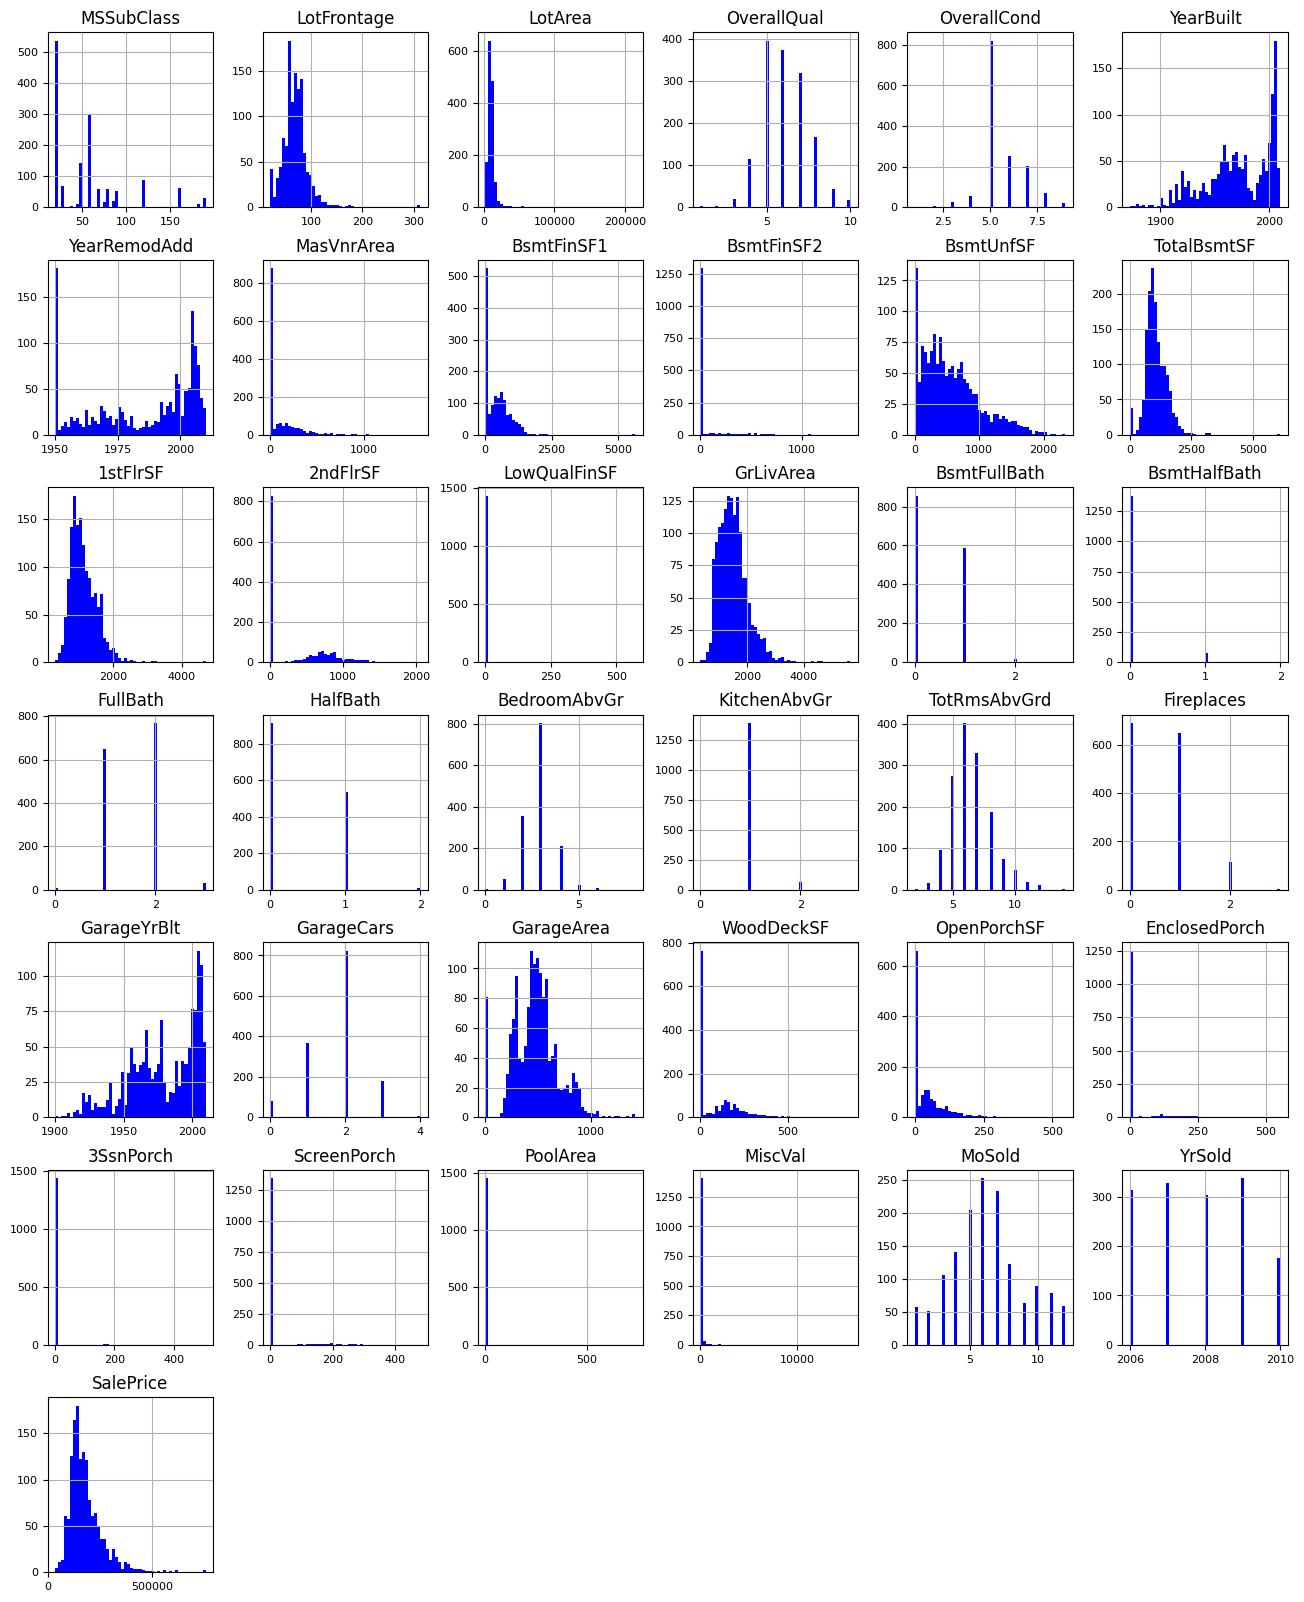

In [43]:
df_num.hist(figsize=(16, 20), color='b',bins=50, xlabelsize=8, ylabelsize=8);

## Spliting the dataset

This dataset includes a variety of feature types—numeric, categorical, and missing values. One of the advantages of using TensorFlow Decision Forests (TF-DF) is its ability to handle all these feature types directly, without requiring extra preprocessing. This makes tree-based models an excellent entry point for working with TensorFlow and machine learning.

Next, we’ll split the dataset into training and testing subsets:


In [20]:
def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

1026 examples in training, 434 examples in testing.


## Identify the output's feature

In [21]:
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

## Select the Model

There are several tree-based models available for you to choose from:

- `RandomForestModel`
- `GradientBoostedTreesModel`
- `CartModel`
- `DistributedGradientBoostedTreesModel`

To start, we'll work with the `RandomForestModel`, which is the most well-known of the Decision Forest training algorithms.

A Random Forest is a collection of decision trees, each trained independently on a random subset of the training dataset (sampled with replacement). This algorithm is notable for its robustness to overfitting and its ease of use.

To list all the available models in TensorFlow Decision Forests, you can use the following code:


In [22]:
tfdf.keras.get_all_models()


[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

### To configure TensorFlow Decision Forests models:

TensorFlow Decision Forests (TF-DF) comes with default settings optimized for performance and efficiency. However, if you want to customize the configuration for potentially better accuracy, you can adjust various parameters.


## Choose the RandomForest Model

In [23]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"])

Use /tmp/tmplb3rzqem as temporary training directory


## Train the Model

In [24]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:08.861044. Found 1026 examples.
Training model...
Model trained in 0:00:04.111504
Compiling model...
Model compiled.


## Visualize the model (branches)

In [46]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=6)

## Evaluation of Model by Out of Bag(OOB)

Before training, we have manually separated 20% of the dataset for validation, named `valid_ds`.

We can also use the Out of Bag (OOB) score to validate our `RandomForestModel`. During training, the algorithm selects a random subset of samples from the training set, and the remaining samples are used to fine-tune the model. The subset not chosen is referred to as Out of Bag data (OOB), and the OOB score is computed based on this data.

The training logs display the Root Mean Squared Error (RMSE) evaluated on the OOB dataset in relation to the number of trees in the model. Let’s plot this.

**Note:** Smaller values are better for this hyperparameter.


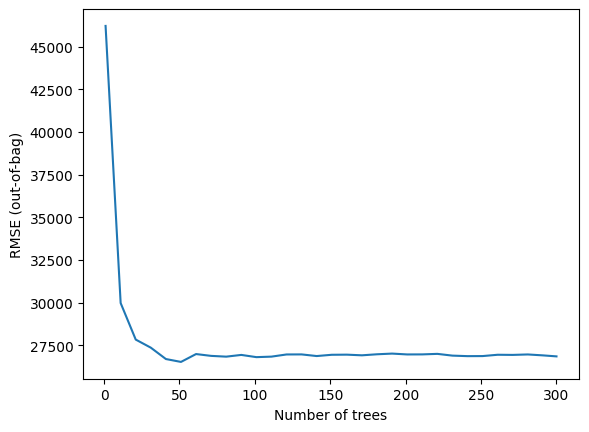

In [26]:
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

The `inspector` allows you to examine and analyze various aspects of the trained model, such as feature importance, tree structures, and evaluation metrics.

**Reason:** Using the inspector helps in understanding model behavior, diagnosing performance issues, and interpreting results, which is crucial for improving and validating the model's effectiveness.


In [27]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1026, accuracy=None, loss=None, rmse=26856.97264035901, ndcg=None, aucs=None, auuc=None, qini=None)

In [28]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 8s 8s/step - loss: 0.0000e+00 - mse: 1156342272.0000
loss: 0.0000
mse: 1156342272.0000


## Variable Importances


Variable importances generally indicate the contribution of each feature to the model's predictions or quality. TensorFlow Decision Forests provides several methods to identify important features. Here are the available Variable Importances for Decision Trees:



In [29]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 NUM_AS_ROOT
	 NUM_NODES
	 SUM_SCORE
	 INV_MEAN_MIN_DEPTH


Available variable importances in TensorFlow Decision Forests include:

- **`NUM_AS_ROOT`:** Counts how often a feature is used as the root node in decision trees.
- **`NUM_NODES`:** Indicates the number of nodes where a feature is used in the decision trees.
- **`SUM_SCORE`:** Represents the total score or gain attributed to a feature across all trees.
- **`INV_MEAN_MIN_DEPTH`:** Measures the inverse of the average minimum depth at which a feature is used, reflecting its importance based on its position in the tree.

These metrics help assess how influential each feature is in the model's predictions.


In [30]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #62), 130.0),
 ("ExterQual" (4; #22), 63.0),
 ("Neighborhood" (4; #59), 36.0),
 ("GarageCars" (1; #32), 25.0),
 ("YearBuilt" (1; #76), 12.0),
 ("GrLivArea" (1; #38), 9.0),
 ("KitchenQual" (4; #44), 8.0),
 ("TotalBsmtSF" (1; #73), 6.0),
 ("GarageArea" (1; #31), 5.0),
 ("BsmtQual" (4; #14), 4.0),
 ("1stFlrSF" (1; #0), 2.0)]

In [48]:
len(inspector.variable_importances()["NUM_AS_ROOT"])

11

In [49]:
len(inspector.variable_importances()["NUM_NODES"])

72

In [50]:
len(inspector.variable_importances()["SUM_SCORE"])

72

In [51]:
len(inspector.variable_importances()["INV_MEAN_MIN_DEPTH"])

72

In [31]:
inspector.variable_importances()["NUM_NODES"]

[("Neighborhood" (4; #59), 4270.0),
 ("GrLivArea" (1; #38), 3710.0),
 ("GarageArea" (1; #31), 2427.0),
 ("TotalBsmtSF" (1; #73), 2418.0),
 ("LotArea" (1; #47), 2024.0),
 ("1stFlrSF" (1; #0), 2008.0),
 ("BsmtFinSF1" (1; #8), 1970.0),
 ("Exterior2nd" (4; #24), 1815.0),
 ("BsmtUnfSF" (1; #15), 1649.0),
 ("YearRemodAdd" (1; #77), 1523.0),
 ("BsmtFinType1" (4; #10), 1461.0),
 ("OverallQual" (1; #62), 1421.0),
 ("Exterior1st" (4; #23), 1420.0),
 ("LotFrontage" (1; #49), 1240.0),
 ("OpenPorchSF" (1; #60), 1235.0),
 ("MoSold" (1; #58), 1201.0),
 ("YearBuilt" (1; #76), 1112.0),
 ("2ndFlrSF" (1; #1), 1042.0),
 ("WoodDeckSF" (1; #75), 1035.0),
 ("GarageYrBlt" (1; #37), 995.0),
 ("MasVnrArea" (1; #54), 963.0),
 ("YrSold" (1; #78), 876.0),
 ("OverallCond" (1; #61), 759.0),
 ("HeatingQC" (4; #41), 666.0),
 ("BsmtExposure" (4; #7), 626.0),
 ("TotRmsAbvGrd" (1; #72), 608.0),
 ("GarageFinish" (4; #34), 604.0),
 ("KitchenQual" (4; #44), 456.0),
 ("Fireplaces" (1; #27), 439.0),
 ("HouseStyle" (4; #42), 3

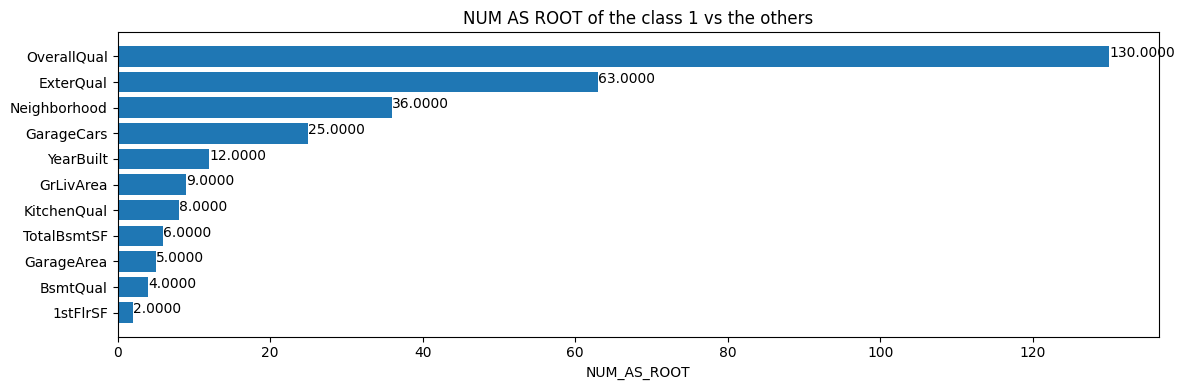

In [37]:
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

## Testing

In [61]:
test_data = pd.read_csv("test.csv")
ids = test_data.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)

preds = rf.predict(test_ds)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()

2/2 [==============================] - 1s 61ms/step


,Id,SalePrice
0,1461,129336.617188
1,1462,152082.812500
2,1463,178321.312500
3,1464,182454.750000
4,1465,191657.468750


## Submission

In [62]:
sample_submission_df = pd.read_csv('sample_submission.csv')
sample_submission_df['SalePrice'] = rf.predict(test_ds)
sample_submission_df.to_csv('submission.csv', index=False)
sample_submission_df.head()

2/2 [==============================] - 0s 34ms/step


,Id,SalePrice
0,1461,129336.617188
1,1462,152082.812500
2,1463,178321.312500
3,1464,182454.750000
4,1465,191657.468750
